<a href="https://colab.research.google.com/github/Hetal-byte/Heta2-2/blob/main/adproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/segmentation_data.csv'

In [ ]:
df = pd.read_csv(file_path)
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000000,0,0,27,0,302122,1,1
1,100000001,1,0,45,3,228035,0,0
2,100000002,1,1,37,0,126914,2,2
3,100000003,1,0,75,1,58989,2,0
4,100000004,1,1,75,3,156718,1,2
...,...,...,...,...,...,...,...,...
89995,100089995,0,0,36,2,43672,1,0
89996,100089996,0,1,56,2,74230,2,0
89997,100089997,1,1,39,2,61334,2,1
89998,100089998,0,1,55,2,178610,1,0


In [ ]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000000,0,0,27,0,302122,1,1
1,100000001,1,0,45,3,228035,0,0
2,100000002,1,1,37,0,126914,2,2
3,100000003,1,0,75,1,58989,2,0
4,100000004,1,1,75,3,156718,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               90000 non-null  int64
 1   Sex              90000 non-null  int64
 2   Marital status   90000 non-null  int64
 3   Age              90000 non-null  int64
 4   Education        90000 non-null  int64
 5   Income           90000 non-null  int64
 6   Occupation       90000 non-null  int64
 7   Settlement size  90000 non-null  int64
dtypes: int64(8)
memory usage: 5.5 MB


In [ ]:
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [ ]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.003631,0.002863,0.001367,0.000674,0.008180,0.004329,0.001509
Sex,0.003631,1.000000,-0.006291,-0.003218,0.000208,0.002664,0.001553,0.001186
Marital status,0.002863,-0.006291,1.000000,0.005043,0.000330,-0.003627,0.002199,-0.004383
Age,0.001367,-0.003218,0.005043,1.000000,-0.002240,0.002937,-0.001191,0.001166
Education,0.000674,0.000208,0.000330,-0.002240,1.000000,0.004496,0.000069,-0.003987
Income,0.008180,0.002664,-0.003627,0.002937,0.004496,1.000000,0.001898,0.005426
Occupation,0.004329,0.001553,0.002199,-0.001191,0.000069,0.001898,1.000000,0.001664
Settlement size,0.001509,0.001186,-0.004383,0.001166,-0.003987,0.005426,0.001664,1.000000


In [ ]:
df.dropna(inplace=True)

In [ ]:
features = ['Age', 'Income']
data_scaled = StandardScaler().fit_transform(df[features])

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64


In [ ]:
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
                 ID           Sex  Marital status           Age     Education  \
count  9.000000e+04  90000.000000    90000.000000  90000.000000  90000.000000   
mean   1.000450e+08      0.499911        0.495767     46.963200      1.498989   
std    2.598091e+04      0.500003        0.499985     17.066078      1.118795   
min    1.000000e+08      0.000000        0.000000     18.000000      0.000000   
25%    1.000225e+08      0.000000        0.000000     32.000000      0.000000   
50%    1.000450e+08      0.000000        0.000000     47.000000      1.000000   
75%    1.000675e+08      1.000000        1.000000     62.000000      3.000000   
max    1.000900e+08      1.000000        1.000000     76.000000      3.000000   

              Income    Occupation  Settlement size  
count   90000.000000  90000.000000     90000.000000  
mean   172465.405278      0.996511         1.001767  
std     79132.007204      0.815091         0.815430  
min     35832.000000      0.00000

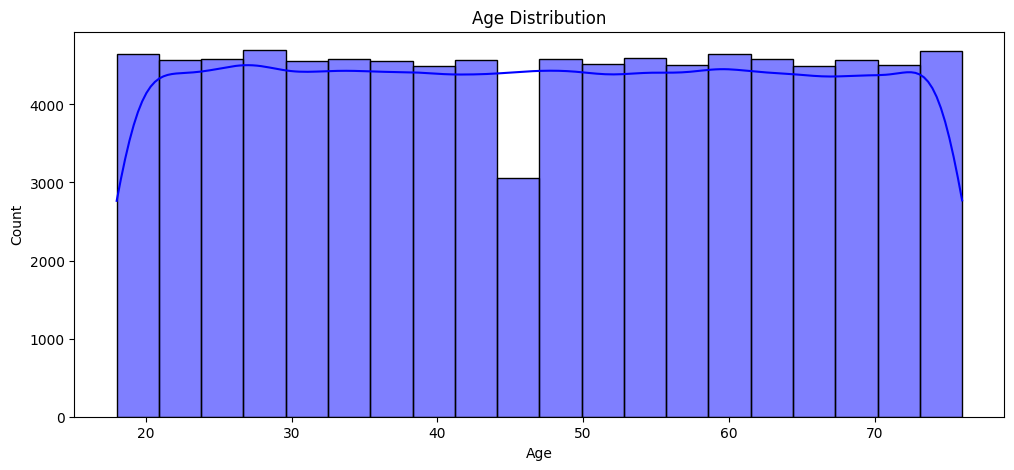

In [ ]:
#data visualization
plt.figure(figsize=(12, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='blue')
plt.title("Age Distribution")
plt.show()

In [ ]:
print(df.columns)

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()

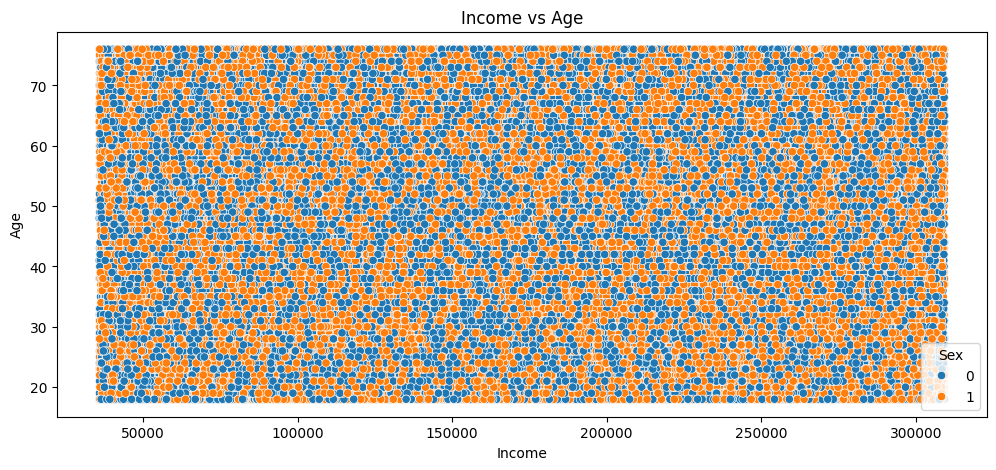

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Income'], y=df['Age'], hue=df['Sex'])
plt.title("Income vs Age")
plt.show()

In [ ]:
#Handling Missing Values
df.dropna(inplace=True)

In [ ]:
# Encoding categorical variables
if 'Gender' in df.columns:
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [ ]:
features = ['Age', 'Income', 'Education']
data_scaled = StandardScaler().fit_transform(df[features])

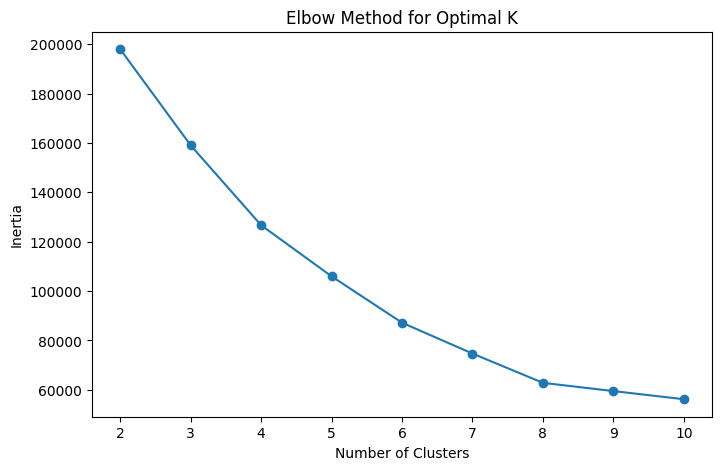

In [ ]:
# K-Means Clustering
inertia = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
# Choosing optimal k (Assuming k=5 based on elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)
df['KMeans_Cluster'] = kmeans_labels

In [ ]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

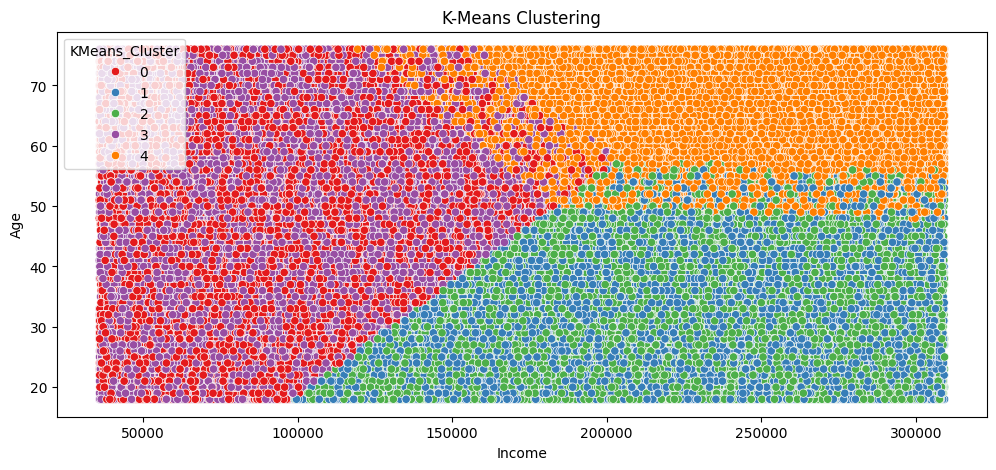

In [ ]:
# Visualizing Clusters
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Income'], y=df['Age'], hue=df['KMeans_Cluster'], palette='Set1')
plt.title("K-Means Clustering")
plt.show()

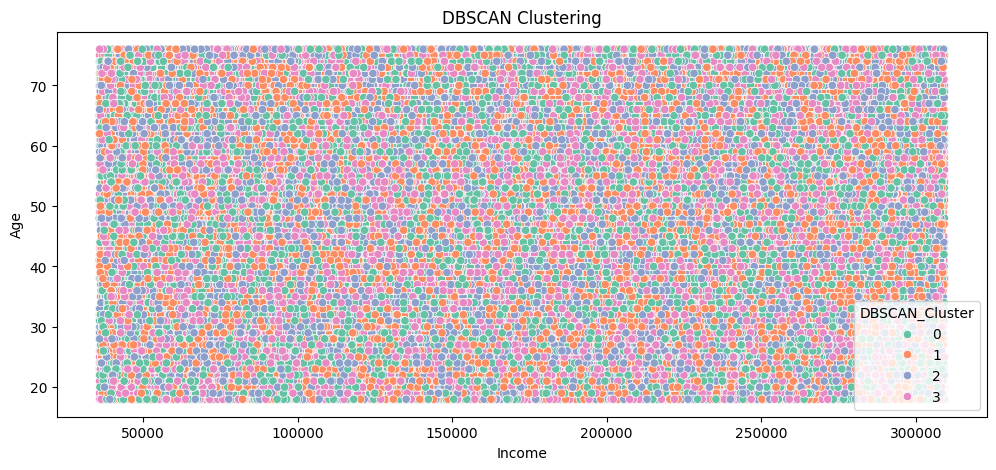

In [ ]:
plt.figure(figsize=(12, 5))
sns.scatterplot(x=df['Income'], y=df['Age'], hue=df['DBSCAN_Cluster'], palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
features_to_scale = ['Age', 'Income']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])
print(df_scaled.head())

          ID  Sex  Marital status       Age  Education    Income  Occupation  \
0  100000000    0               0 -1.169766          0  1.638494           1   
1  100000001    1               0 -0.115036          3  0.702243           0   
2  100000002    1               1 -0.583805          0 -0.575641           2   
3  100000003    1               0  1.642847          1 -1.434022           2   
4  100000004    1               1  1.642847          3 -0.199003           1   

   Settlement size  KMeans_Cluster  DBSCAN_Cluster  
0                1               1               0  
1                0               2               1  
2                2               0               0  
3                0               0               2  
4                2               3               1  


In [ ]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

In [ ]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])
df_scaled.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans_Cluster,DBSCAN_Cluster
0,-1.732032,-0.999822,-0.991569,-1.169766,-1.339832,1.638494,0.004280,-0.002167,1,-1.340175
1,-1.731993,1.000178,-0.991569,-0.115036,1.341640,0.702243,-1.222584,-1.228520,2,-0.445180
2,-1.731955,1.000178,1.008503,-0.583805,-1.339832,-0.575641,1.231144,1.224187,0,-1.340175
3,-1.731916,1.000178,-0.991569,1.642847,-0.446008,-1.434022,1.231144,-1.228520,0,0.449814
4,-1.731878,1.000178,1.008503,1.642847,1.341640,-0.199003,0.004280,1.224187,3,-0.445180


In [ ]:
df.to_csv("segmented_customers.csv", index=False)
print("Processed data saved as 'segmented_customers.csv'")

Processed data saved as 'segmented_customers.csv'


In [ ]:
df = pd.read_csv("/content/segmentation_data.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000000,0,0,27,0,302122,1,1
1,100000001,1,0,45,3,228035,0,0
2,100000002,1,1,37,0,126914,2,2
3,100000003,1,0,75,1,58989,2,0
4,100000004,1,1,75,3,156718,1,2
...,...,...,...,...,...,...,...,...
89995,100089995,0,0,36,2,43672,1,0
89996,100089996,0,1,56,2,74230,2,0
89997,100089997,1,1,39,2,61334,2,1
89998,100089998,0,1,55,2,178610,1,0


In [ ]:
df = pd.read_csv("/content/segmented_customers.csv")
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,KMeans_Cluster,DBSCAN_Cluster
0,100000000,0,0,27,0,302122,1,1,1,0
1,100000001,1,0,45,3,228035,0,0,2,1
2,100000002,1,1,37,0,126914,2,2,0,0
3,100000003,1,0,75,1,58989,2,0,0,2
4,100000004,1,1,75,3,156718,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...
89995,100089995,0,0,36,2,43672,1,0,3,3
89996,100089996,0,1,56,2,74230,2,0,3,3
89997,100089997,1,1,39,2,61334,2,1,3,3
89998,100089998,0,1,55,2,178610,1,0,4,3
